In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from Linear_Model.linear_regression import Linear_Regression
from preprocessing.feature_scaling import Feature_Scaling

In [2]:
def load_house_data():
    data = np.loadtxt('./data/houses.txt', delimiter = ',', skiprows = 1)
    X = data[:, :4]
    y = data[:, 4]

    return X, y

In [3]:
X, y = load_house_data()

In [4]:
print(X[:4, :])
print(y[:4])

[[1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]]
[300.  509.8 394.  540. ]


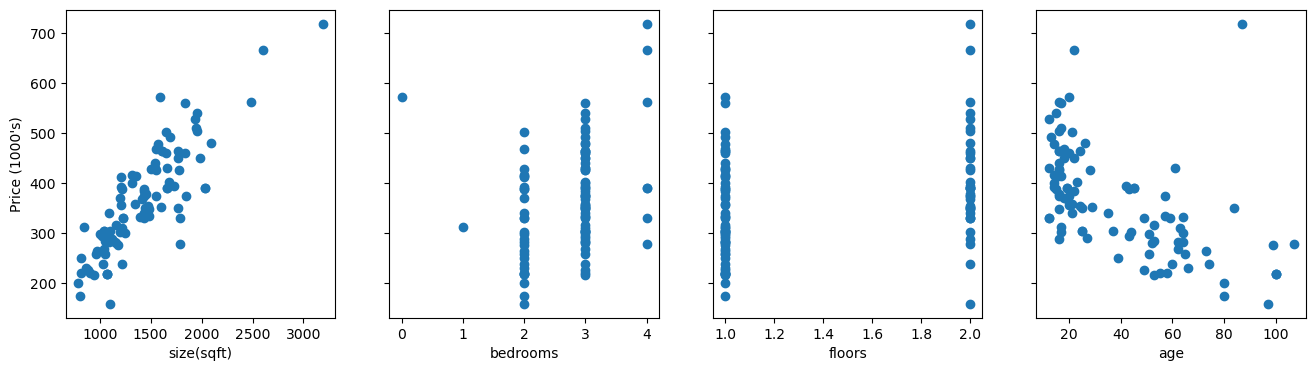

In [5]:
X_features = ['size(sqft)','bedrooms','floors','age']

fig, ax = plt.subplots(1, 4, figsize = (16, 4), sharey = True)

for i in range(X.shape[1]):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price (1000's)")
plt.show()

In [42]:
def plot_cost_i_w(X, y, hist_df):
    
    rng = max(abs(hist_df['w_0'].min()),abs(hist_df['w_0'].max()))
    wr = np.linspace(-rng + 0.27, rng + 0.27, 20)
    cst = [lr.compute_cost(X, y, np.array([wr[i], -32, -67, -1.46]), 221) for i in range(len(wr))]


    fig,ax = plt.subplots(1,2,figsize=(12,3))
    
    ax[0].plot(np.array(hist_df.index), (hist_df["J_history"]));  ax[0].set_title("Cost vs Iteration")
    ax[0].set_xlabel("iteration"); ax[0].set_ylabel("Cost")
    
    ax[1].plot(wr, cst); ax[1].set_title("Cost vs w[0]")
    ax[1].set_xlabel("w[0]"); ax[1].set_ylabel("Cost")
    ax[1].plot(hist_df['w_0'], hist_df["J_history"])
    
    plt.show()

In [6]:
lr = Linear_Regression()
df, w, b = lr.run_gradient_descent(X, y, 10, alpha = 9.9e-7)

In [7]:
df

,J_history,b,djdb,w_0,djdw_0,w_1,djdw_1,w_2,djdw_2,w_3,djdw_3
0,9.558840e+04,0.000000,-363.156081,0.546266,-5.517836e+05,0.000996,-1006.002303,0.000513,-518.511737,0.012279,-12402.745030
1,1.282128e+05,0.000360,412.128046,-0.087708,6.403775e+05,-0.000174,1181.799334,-0.000100,619.761626,-0.003409,15846.612942
2,1.721594e+05,-0.000048,-487.690291,0.648130,-7.432704e+05,0.001170,-1357.422884,0.000594,-701.344924,0.013363,-16941.514111
3,2.313576e+05,0.000434,556.651419,-0.205865,8.626213e+05,-0.000404,1589.640727,-0.000230,831.957888,-0.007538,21111.781320
4,3.111001e+05,-0.000117,-655.440939,0.785334,-1.001211e+06,0.001409,-1830.797288,0.000709,-947.628355,0.015286,-23055.004580
5,4.185168e+05,0.000532,751.332745,-0.365039,1.161993e+06,-0.000709,2139.024400,-0.000398,1117.795878,-0.012636,28204.610043
6,5.632119e+05,-0.000212,-881.405964,0.970142,-1.348668e+06,0.001735,-2468.448670,0.000869,-1279.381957,0.018341,-31289.712314
7,7.581224e+05,0.000661,1013.578959,-0.579464,1.565259e+06,-0.001116,2879.071523,-0.000619,1502.832399,-0.019041,37759.374002
8,1.020675e+06,-0.000343,-1185.788230,1.219077,-1.816708e+06,0.002179,-3327.388118,0.001090,-1726.267505,0.022917,-42381.790437
9,1.374345e+06,0.000831,1366.837937,-0.868315,2.108476e+06,-0.001659,3875.950390,-0.000911,2021.493546,-0.027207,50630.468380


In [8]:
w, b

(array([-0.86831498, -0.00165867, -0.0009115 , -0.02720726]),
 -0.0005217771248863874)

In [ ]:
plt.plot(df.index, df['w_0'])
plt.show()

In [37]:
rng = max(abs(df['w_0'].min()),abs(ws['w_0'].max()))

wr = np.linspace(-rng+0.27,rng+0.27,20)
[lr.compute_cost(X, y, np.array([wr[i],-32, -67, -1.46]), 221) for i in range(len(wr))]

[np.array([wr[i],-32, -67, -1.46]) for i in range(len(wr)) ]

[array([ -0.94907652, -32.        , -67.        ,  -1.46      ]),
 array([ -0.82075268, -32.        , -67.        ,  -1.46      ]),
 array([ -0.69242883, -32.        , -67.        ,  -1.46      ]),
 array([ -0.56410499, -32.        , -67.        ,  -1.46      ]),
 array([ -0.43578114, -32.        , -67.        ,  -1.46      ]),
 array([ -0.3074573, -32.       , -67.       ,  -1.46     ]),
 array([ -0.17913345, -32.        , -67.        ,  -1.46      ]),
 array([-5.08096105e-02, -3.20000000e+01, -6.70000000e+01, -1.46000000e+00]),
 array([  0.07751423, -32.        , -67.        ,  -1.46      ]),
 array([  0.20583808, -32.        , -67.        ,  -1.46      ]),
 array([  0.33416192, -32.        , -67.        ,  -1.46      ]),
 array([  0.46248577, -32.        , -67.        ,  -1.46      ]),
 array([  0.59080961, -32.        , -67.        ,  -1.46      ]),
 array([  0.71913345, -32.        , -67.        ,  -1.46      ]),
 array([  0.8474573, -32.       , -67.       ,  -1.46     ]),
 array

In [20]:
np.array(df.index) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

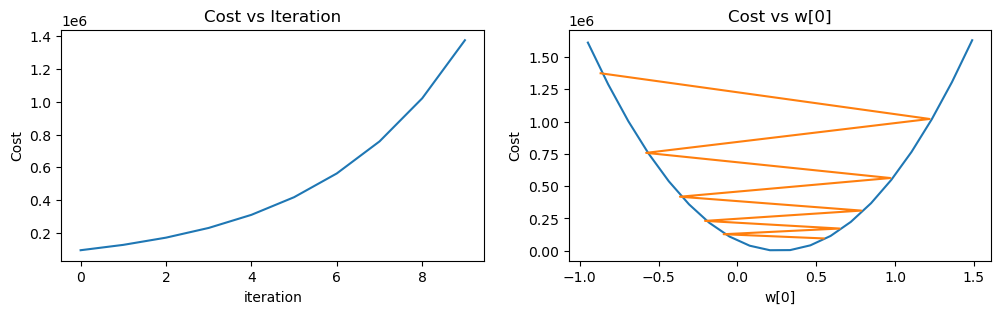

In [43]:
plot_cost_i_w(X, y, df)

In [46]:
df, w, b = lr.run_gradient_descent(X, y, 10, alpha = 9e-7)
df

,J_history,b,djdb,w_0,djdw_0,w_1,djdw_1,w_2,djdw_2,w_3,djdw_3
0,66461.583554,0.000000,-363.156081,0.496605,-551783.623980,0.000905,-1006.002303,0.000467,-518.511737,0.011162,-12402.745030
1,61898.999833,0.000327,341.647671,0.017806,531999.247455,0.000021,982.908276,0.000002,516.282229,-0.000788,13278.489490
2,57657.209120,0.000019,-337.930779,0.479493,-512985.711795,0.000862,-934.812430,0.000435,-481.469187,0.009548,-11484.478490
3,53713.654702,0.000323,317.314062,0.034362,494590.296840,0.000039,914.246310,0.000003,480.562545,-0.001604,12390.926168
4,50047.365955,0.000038,-314.479607,0.463586,-476915.897031,0.000821,-868.629037,0.000405,-447.031419,0.007964,-10630.856308
5,46638.846817,0.000321,294.691090,0.049756,459811.781550,0.000056,850.411633,0.000003,447.354401,-0.002445,11565.696595
6,43469.972104,0.000056,-292.677814,0.448800,-443382.351829,0.000782,-807.100089,0.000376,-415.015275,0.006408,-9837.332853
7,40523.891115,0.000319,273.658470,0.064069,427478.740894,0.000070,791.064813,0.000001,416.481196,-0.003310,10798.417859
8,37784.938018,0.000073,-272.409423,0.435055,-412206.736830,0.000745,-749.898305,0.000348,-385.250478,0.004879,-9099.682119
9,35238.548532,0.000318,254.104378,0.077378,397419.219804,0.000083,735.890284,-0.000001,387.778747,-0.004197,10085.015235


In [47]:
w, b

(array([ 7.73775314e-02,  8.27287625e-05, -1.06291972e-06, -4.19710549e-03]),
 8.931422833779215e-05)

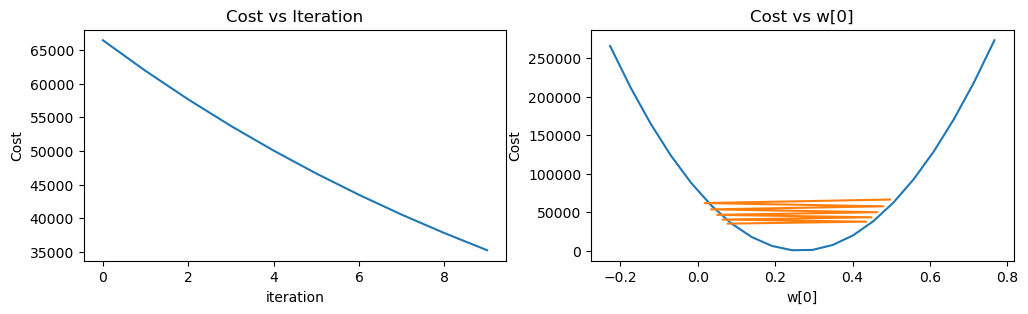

In [48]:
plot_cost_i_w(X, y, df)

In [49]:
df, w, b = lr.run_gradient_descent(X, y, 10, alpha = 1e-7)
df

,J_history,b,djdb,w_0,djdw_0,w_1,djdw_1,w_2,djdw_2,w_3,djdw_3
0,44231.265257,0.000000,-363.156081,0.055178,-551783.623980,0.000101,-1006.002303,0.000052,-518.511737,0.001240,-12402.745030
1,27646.115403,0.000036,-284.844553,0.098315,-431363.304931,0.000179,-785.012239,0.000092,-403.534630,0.002195,-9549.274528
2,17510.224442,0.000065,-223.624163,0.132037,-337224.070213,0.000240,-612.252190,0.000124,-313.650675,0.002927,-7318.571958
3,11315.743250,0.000087,-175.764863,0.158400,-263630.215024,0.000288,-477.196217,0.000148,-243.383429,0.003485,-5574.721579
4,7530.021146,0.000105,-138.350667,0.179010,-206097.821180,0.000325,-371.615608,0.000167,-188.451649,0.003906,-4211.470527
5,5216.391691,0.000119,-109.101987,0.195122,-161121.561435,0.000354,-289.077524,0.000181,-145.508453,0.004220,-3145.755052
6,3802.419152,0.000129,-86.236744,0.207718,-125961.127297,0.000377,-224.553059,0.000192,-111.937398,0.004452,-2312.639620
7,2938.264295,0.000138,-68.361786,0.217566,-98474.267809,0.000394,-174.110837,0.000201,-85.693065,0.004618,-1661.360524
8,2410.125845,0.000145,-54.388012,0.225264,-76986.266722,0.000407,-134.677484,0.000208,-65.176435,0.004733,-1152.232965
9,2087.340969,0.000150,-43.464008,0.231283,-60187.905570,0.000418,-103.850375,0.000212,-49.137468,0.004808,-754.233137


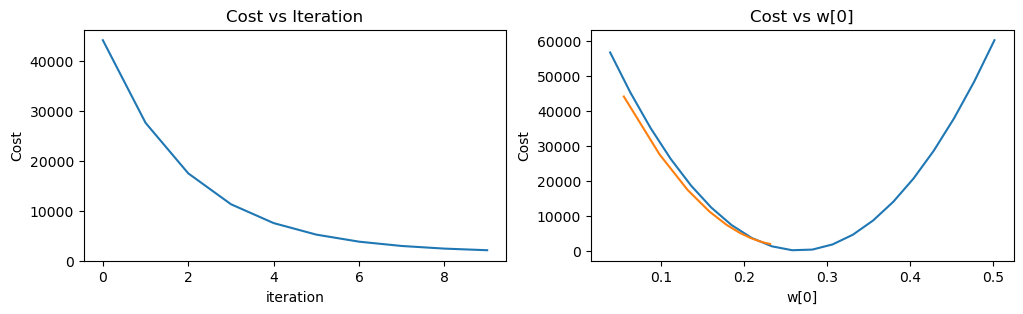

In [50]:
plot_cost_i_w(X, y, df)

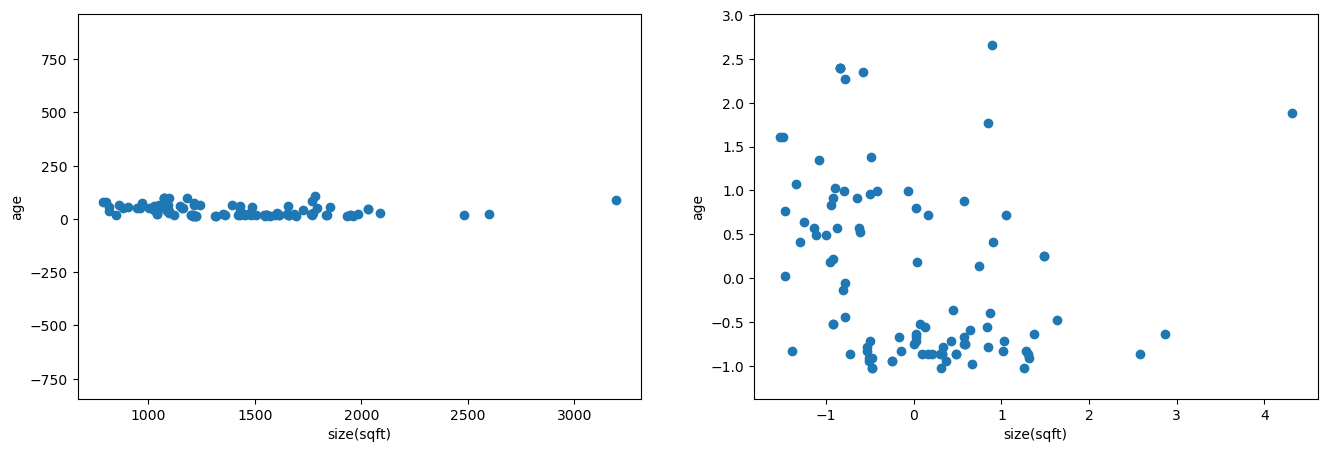

In [70]:
fs = Feature_Scaling()
X_Norm = fs.z_score(X)

fig, ax = plt.subplots(1, 2, figsize = (16, 5))

ax[0].scatter(X[:, 0], X[:, 3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3])
ax[0].axis('equal')

ax[1].scatter(X_Norm[:, 0], X_Norm[:, 3])
ax[1].set_xlabel(X_features[0]); ax[1].set_ylabel(X_features[3])
ax[1].axis('equal')

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

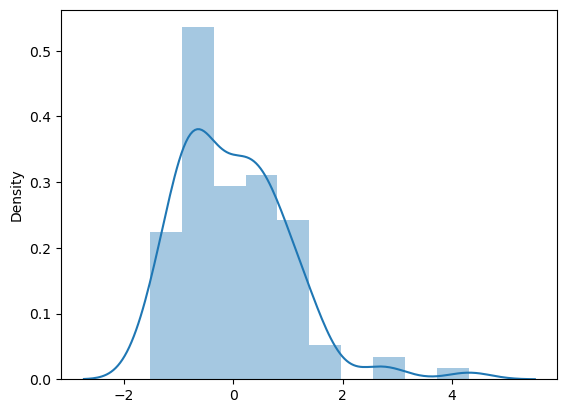

In [76]:
sns.distplot(X_Norm[:, 0])

In [120]:
df, w, b = lr.run_gradient_descent(X_Norm, y, 10000, 1e-1 )

In [121]:
df[np.array(df.index) % 100 == 0]

,J_history,b,djdb,w_0,djdw_0,w_1,djdw_1,w_2,djdw_2,w_3,djdw_3
0,57617.032522,0.000000,-3.631561e+02,8.914282,-8.914282e+01,2.951825,-2.951825e+01,3.282291,-3.282291e+01,-5.960844,5.960844e+01
100,221.085627,363.146435,-9.645934e-03,107.916661,-9.151882e-01,-19.954692,4.480402e-01,-31.204674,5.277232e-01,-38.477538,-1.718566e-01
200,219.208900,363.156081,-2.562095e-07,110.472490,-3.043743e-02,-21.222803,1.534081e-02,-32.658039,1.703139e-02,-37.987382,-5.957016e-03
300,219.206827,363.156081,-6.862264e-12,110.557475,-1.011886e-03,-21.265675,5.109840e-04,-32.705549,5.651021e-04,-37.970732,-1.984593e-04
400,219.206824,363.156081,-2.704369e-13,110.560300,-3.363922e-05,-21.267102,1.698929e-05,-32.707127,1.878394e-05,-37.970178,-6.598485e-06
...,...,...,...,...,...,...,...,...,...,...,...
9500,219.206824,363.156081,-2.655564e-13,110.560398,-7.048010e-14,-21.267151,1.320605e-14,-32.707181,2.648387e-14,-37.970159,-2.712981e-14
9600,219.206824,363.156081,-2.655564e-13,110.560398,-7.048010e-14,-21.267151,1.320605e-14,-32.707181,2.648387e-14,-37.970159,-2.712981e-14
9700,219.206824,363.156081,-2.655564e-13,110.560398,-7.048010e-14,-21.267151,1.320605e-14,-32.707181,2.648387e-14,-37.970159,-2.712981e-14
9800,219.206824,363.156081,-2.655564e-13,110.560398,-7.048010e-14,-21.267151,1.320605e-14,-32.707181,2.648387e-14,-37.970159,-2.712981e-14


In [122]:
yp = lr.predict(X_Norm, w, b)
yp - y

array([ -4.82384699, -23.82203668,  -4.47583452, -47.85287501,
         5.24701825,  -7.21813269, -36.58221652, -26.44641681,
       -33.00478387, -18.25345587,  15.95303449,  11.62518008,
        35.74682656,   5.52554343,   4.96885969,  11.48006627,
         4.9608337 , -13.3746023 , -31.15897629,  -1.27664175,
       -11.38928614, -12.11784863, -20.4109923 , -22.52003834,
        -8.5378944 , -15.51936672,  -2.69144026,   0.46832953,
        11.87835994, -26.98934948,  11.36376072, -36.75037736,
         1.29110912,  36.10644014,  13.93459878,  -7.18127425,
        27.27328362,  15.94350792,  14.18056908,  -2.42413911,
        44.40849893,  -0.76577842,  11.87835994,  22.80805458,
       -14.93745585,   2.76433227,   1.79852293,   1.67281148,
        28.71716562, -21.34257627,  36.48843249,  41.89247446,
        20.19184989, -36.48685314,   0.97530504,  -6.45556715,
       -10.79091462,  11.58644023,   6.3188211 ,   9.63392348,
        -9.12639852,   0.65932563,  -6.17246213,   2.92

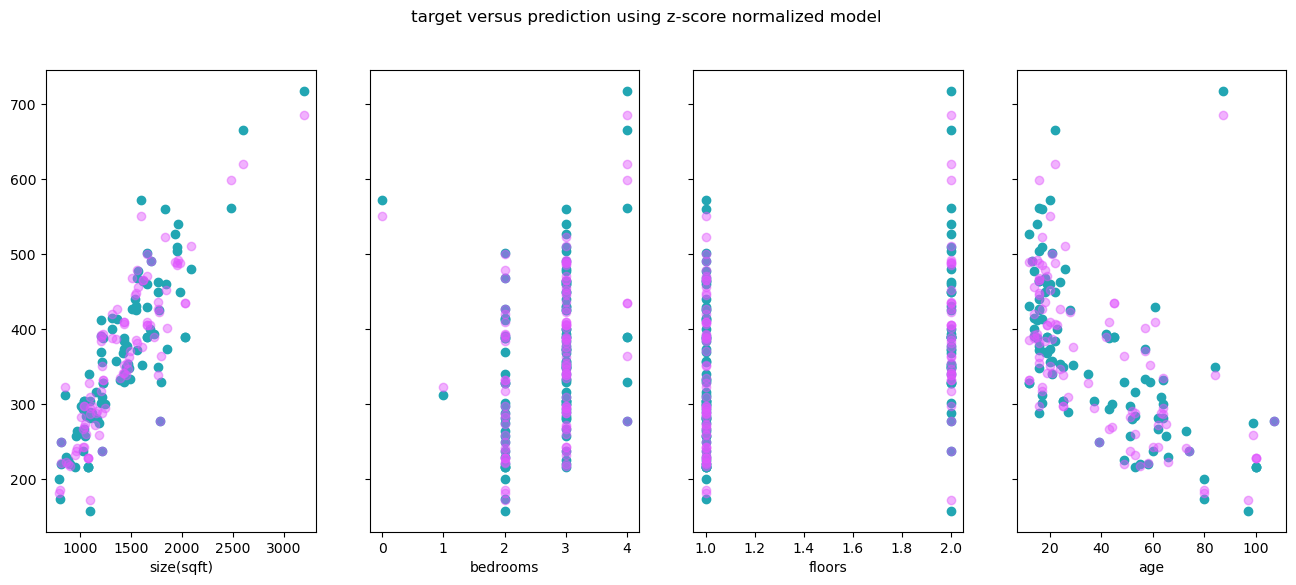

In [123]:
m, n = X.shape

fig, ax = plt.subplots(1, n, figsize = (16, 6), sharey = True)

for i in range(n):
    
    ax[i].scatter(X[:, i], y, color = '#22a6b3', label = 'real data')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X[:, i], yp, color = '#e056fd', label = 'predict data', alpha = 0.45)
    
    
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()